In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import time

path_file = r"C:\Users\Kco\Desktop\randomSound.wav" # This is a unique and unrepeatable sound recorded from a real-life coffee shop.
sample_rate, data = wavfile.read(path_file)

if len(data.shape) == 2:
    data = data.mean(axis=1) # Convert stereo to mono

fft_values = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), d=1/sample_rate)
amplitudes = np.abs(fft_values)

In [2]:
def readRandomNumbers():
    # There are 44100 samples in 1 second of sound
    sample_size = 44100
    i = 0
    x = 0
    y = sample_size
    while i < 5: 
        data = amplitudes[x:y]  
        yield data 
        x += sample_size
        y += sample_size
        i += 1
        time.sleep(5)

In [3]:
random_numbers = readRandomNumbers() # Random numbers can be processed to generate values of the desired bit length

In [4]:
for i in random_numbers:
    print(i)

[ 7115526.          7433396.12286653  7093957.86633595 ...
 91466913.74737507 79631329.73052451 96191771.91582194]
[5.67329726e+07 3.17843986e+07 5.97390791e+07 ... 1.90644084e+08
 3.72321616e+08 2.50672109e+07]
[3.48414130e+07 1.04545428e+08 4.09175079e+08 ... 2.47790556e+08
 2.41968054e+08 2.66733105e+08]
[3.00159050e+08 2.28438427e+08 2.87177124e+08 ... 1.23171796e+08
 1.73130558e+08 1.37319549e+08]
[1.23226180e+08 3.25619919e+08 9.09232989e+07 ... 7.52470874e+06
 3.27809259e+07 2.39891241e+07]


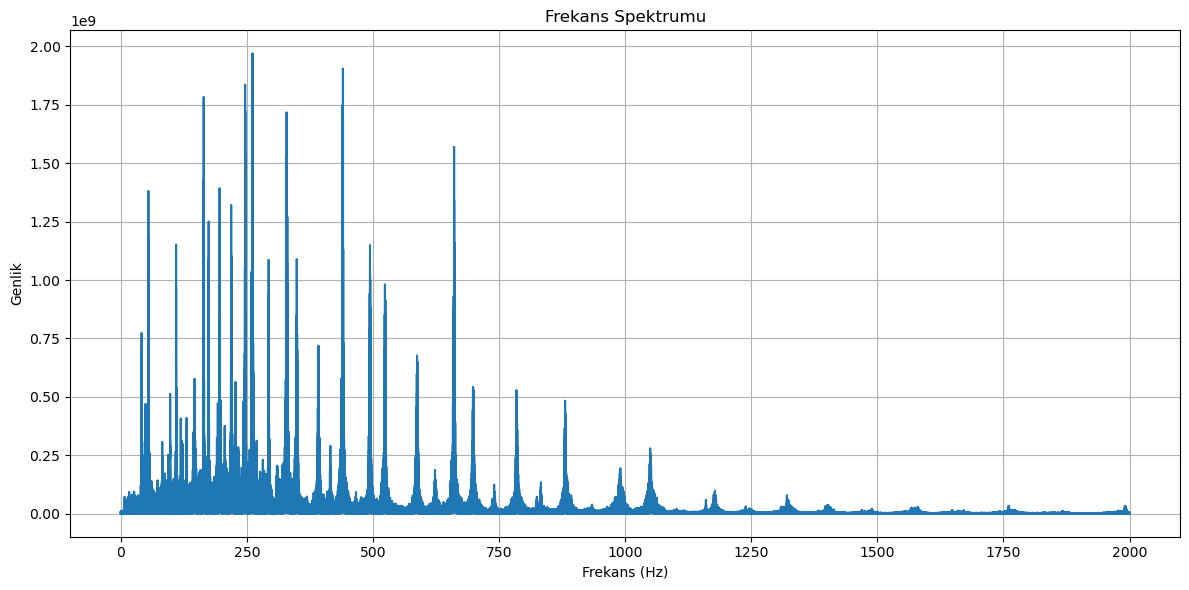

In [5]:
positive_freqs = frequencies[:len(frequencies)//2] # Select only the positive half of the frequency spectrum

positive_amplitudes = amplitudes[:len(amplitudes)//2] # Corresponding amplitudes for the positive frequencies

# Use only frequencies under 2000 Hz for plotting
edge = positive_freqs < 2000

filtered_freqs = positive_freqs[edge]
filtered_amplitudes = positive_amplitudes[edge] 

plt.figure(figsize=(12, 6))
plt.plot(filtered_freqs, filtered_amplitudes)
plt.title("Frekans Spektrumu")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.grid(True)
plt.tight_layout()
plt.show()